# The Sparks Foundation Internship

Data Science and Bussiness Analytics Internship

TASK : Predict the percentage of an student based on the no. of study hours

Author : Manoj Kumawat

In [2]:
#importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import the dataset
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

# Exploratory Data Analysis

In [77]:
#Taking a look at the type of data
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#is data does contain any null-values, and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#Describing the dataframe and taking useful insights form it
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


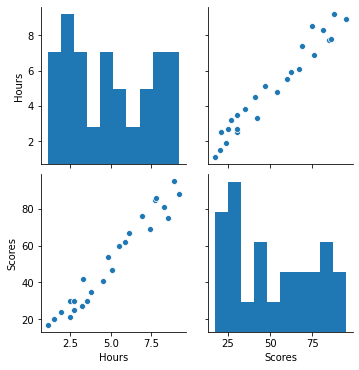

In [6]:
#Creating a pairplot using df
sns.pairplot(df)

We can see that Scores are linearly increasing with no. of study hours

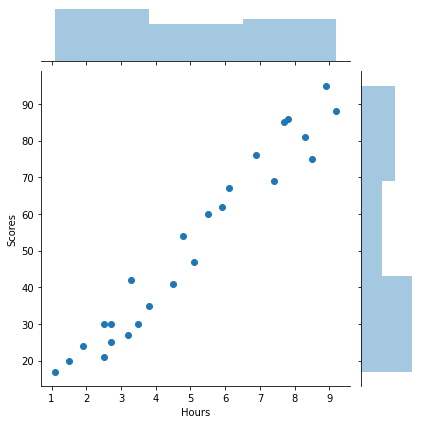

In [7]:
#creating a jointplot between Scores and Hours
sns.jointplot(x='Hours', y = 'Scores', data = df)

# Training a Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Scores column

In [61]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Spliting the data in train and test

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=101) 

Importing and training data with model

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train,y_train)

LinearRegression()

In [48]:
# Testing data - In Hours
print(X_test) 

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]
 [4.8]
 [3.2]
 [8.5]
 [5.1]
 [1.1]
 [6.1]
 [2.5]
 [4.5]]


In [49]:
# Predicting the scores
y_pred = model.predict(X_test) 
y_pred

array([28.09609389, 79.43363197, 40.93047841, 76.47185092, 57.71390432,
       50.80308188, 35.00691632, 87.33171475, 53.76486293, 14.27444902,
       63.6374664 , 28.09609389, 47.84130084])

In [50]:
#Comparing Actual vs Predicted
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df

,Actual,Predicted
0,30,28.096094
1,85,79.433632
2,35,40.930478
3,69,76.471851
4,60,57.713904
5,54,50.803082
6,27,35.006916
7,75,87.331715
8,47,53.764863
9,17,14.274449


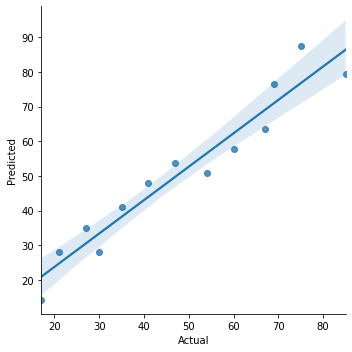

In [75]:
sns.lmplot('Actual','Predicted',pred_df)

In [68]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 94.73616735352087


# Evaluating the Model

In [62]:
from sklearn import metrics

In [78]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)

Mean Absolute Error:  5.652660813474286
Mean Squared Error:  39.91487960671119
Root Mean Squared Error:  6.317822378534489


Since Results are not accurate (or conatins some error), Our the final result may vary

Thank You